# Thompson Sampling with Soft Constraints: 
# Finite-Time Analysis and Regret Bounds

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Load Data

In [2]:
data = np.load('RESULTS_edX_1000_4.npy', allow_pickle=True)[()]

T = data['T']
target_success_prob = data['target_success_prob']

In [12]:
oracle_cum_reward = np.cumsum(data['oracle_avg_reward'])
#con_ucb_cum_reward = np.cumsum(data['con_ucb_avg_reward'])
con_kl_ucb_cum_reward = np.cumsum(data['con_kl_ucb_avg_reward'])
con_ts_cum_reward = np.cumsum(data['con_ts_avg_reward'])

cum_constraint = target_success_prob * np.arange( 0, T, 1)
oracle_cum_violation = np.maximum( 0.0, cum_constraint - np.cumsum( data['oracle_avg_success'] ) )
#con_ucb_cum_violation = np.cumsum(np.maximum(0.0, target_success_prob - data['con_ucb_avg_success']))
con_kl_ucb_cum_violation = np.maximum( 0.0, cum_constraint - np.cumsum( data['con_kl_ucb_avg_success']))
con_ts_cum_violation = np.maximum( 0.0, cum_constraint - np.cumsum( data['con_ts_avg_success']))

#con_ucb_cum_regret = np.maximum(0.0, oracle_cum_reward - con_ucb_cum_reward)
con_kl_ucb_cum_regret = np.maximum(0.0, oracle_cum_reward - con_kl_ucb_cum_reward)
con_ts_cum_regret = np.maximum(0.0, oracle_cum_reward - con_ts_cum_reward)

sampling_interval = 1#int( T / 10 )

# Plot Results

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


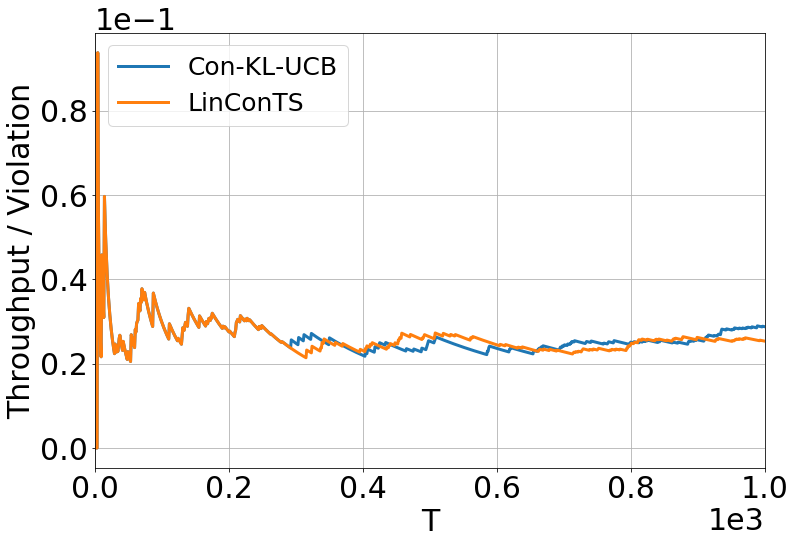

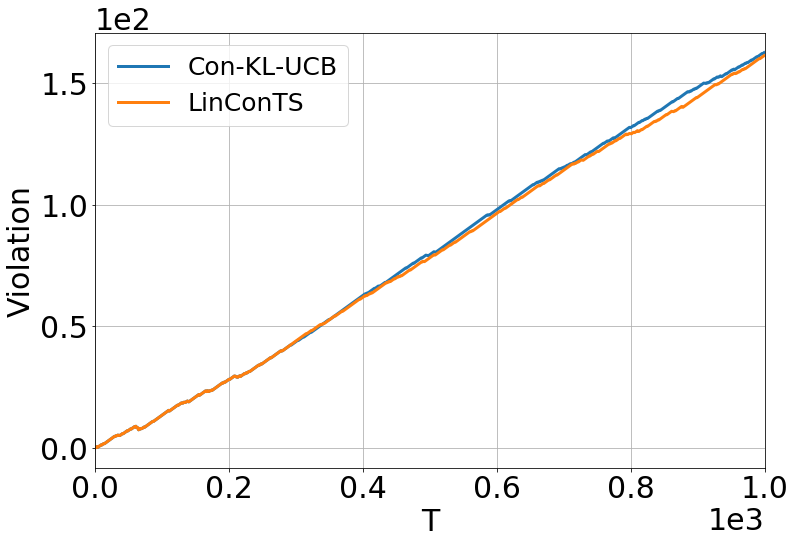

In [13]:
plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 3,
                     'lines.markersize': 20})

#------------------------------------
# Cum. Reward / Cum. Violation
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])

offset = 0
x_ticks = np.arange(offset, T)
samples = np.arange(0, T, sampling_interval)

#plt.plot(x_ticks[samples], np.divide(con_ucb_cum_reward[offset:], con_ucb_cum_violation[offset:])[samples], 'k-v')
plt.plot(x_ticks[samples], np.divide(con_kl_ucb_cum_reward[offset:], con_kl_ucb_cum_violation[offset:])[samples])#, 'k-^')
plt.plot(x_ticks[samples], np.divide(con_ts_cum_reward[offset:], con_ts_cum_violation[offset:])[samples])#, 'k-s')

plt.legend(['Con-KL-UCB', 'LinConTS'], loc='upper left', fontsize=25)
plt.xlabel('T')
plt.ylabel('Throughput / Violation')

plt.show()

#------------------------------------
# Cum. Violation
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 5000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, sampling_interval)

#plt.plot(x_ticks[samples], con_ucb_cum_violation[samples], 'k-v')
plt.plot(x_ticks[samples], con_kl_ucb_cum_violation[samples])#, 'k-^')
plt.plot(x_ticks[samples], con_ts_cum_violation[samples])#, 'k-s')

plt.legend(['Con-KL-UCB', 'LinConTS'], loc='upper left', fontsize=25)
plt.xlabel('T')
plt.ylabel('Violation')

plt.show()

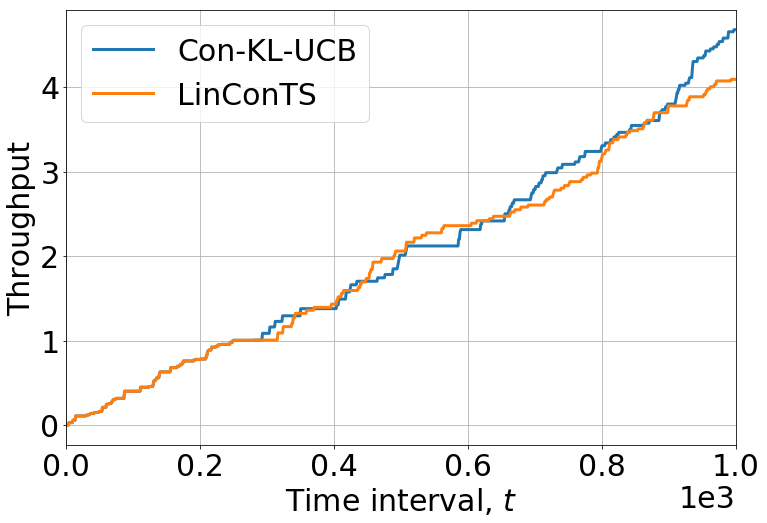

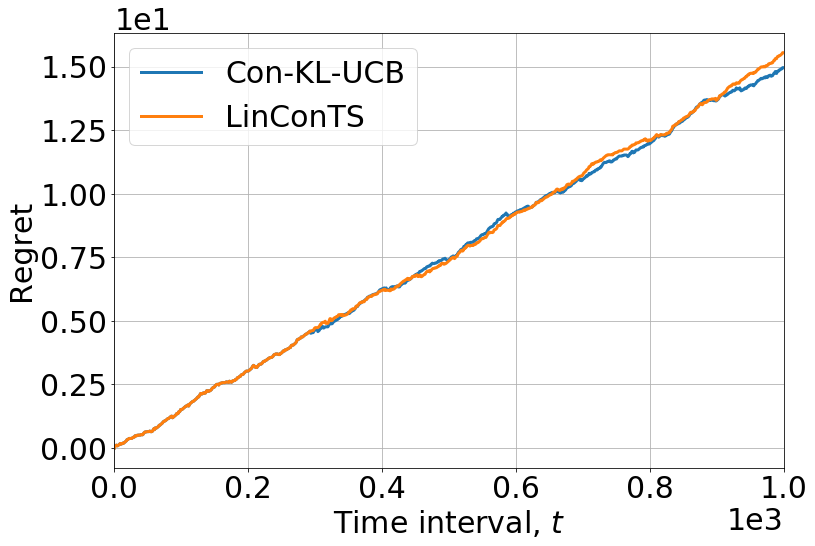

In [14]:
#------------------------------------
# Cum. Reward
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 2000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, sampling_interval)

#plt.plot(x_ticks[samples], con_ucb_cum_reward[samples], 'k-v')
plt.plot(x_ticks[samples], con_kl_ucb_cum_reward[samples])#, 'k-^')
plt.plot(x_ticks[samples], con_ts_cum_reward[samples])#, 'k-s')

plt.legend(['Con-KL-UCB', 'LinConTS'], loc='upper left')
plt.xlabel('Time interval, $t$')
plt.ylabel('Throughput')

plt.show()

#------------------------------------
# Cum. Regret
#------------------------------------

plt.figure(figsize=[12, 8])
plt.grid(True)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))
plt.xlim([0, T])
#plt.ylim([0, 2000])

x_ticks = np.arange(0, T)
samples = np.arange(0, T, sampling_interval)

#plt.plot(x_ticks[samples], con_ucb_cum_regret[samples], 'k-v')
plt.plot(x_ticks[samples], con_kl_ucb_cum_regret[samples])#, 'k-^')
plt.plot(x_ticks[samples], con_ts_cum_regret[samples])#, 'k-s')

plt.legend(['Con-KL-UCB', 'LinConTS'], loc='upper left')
plt.xlabel('Time interval, $t$')
plt.ylabel('Regret')

plt.show()